In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.regression import *
mpl.rcParams['figure.dpi'] = 300

In [2]:
fifa=pd.read_csv('players_20.csv')

In [3]:
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [4]:
for col in fifa.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [8]:
fifa.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [5]:
fifa.shape

(18278, 104)

In [6]:
18278*104

1900912

In [9]:
fifa['nationality'].value_counts()

England                 1667
Germany                 1216
Spain                   1035
France                   984
Argentina                886
Brazil                   824
Italy                    732
Colombia                 591
Japan                    453
Netherlands              416
China PR                 373
Chile                    370
Sweden                   358
Norway                   350
Republic of Ireland      348
United States            347
Denmark                  345
Portugal                 344
Mexico                   340
Poland                   324
Korea Republic           322
Austria                  319
Saudi Arabia             310
Turkey                   294
Romania                  287
Scotland                 277
Belgium                  268
Switzerland              229
Australia                196
Uruguay                  164
Serbia                   139
Ghana                    130
Senegal                  127
Croatia                  126
Nigeria       

In [10]:
fifa['nationality'].value_counts()[0:10]

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

In [13]:
country_name = fifa['nationality'].value_counts()[0:5].keys()

In [14]:
players_number = fifa['nationality'].value_counts()[0:5]
players_number

England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
Name: nationality, dtype: int64

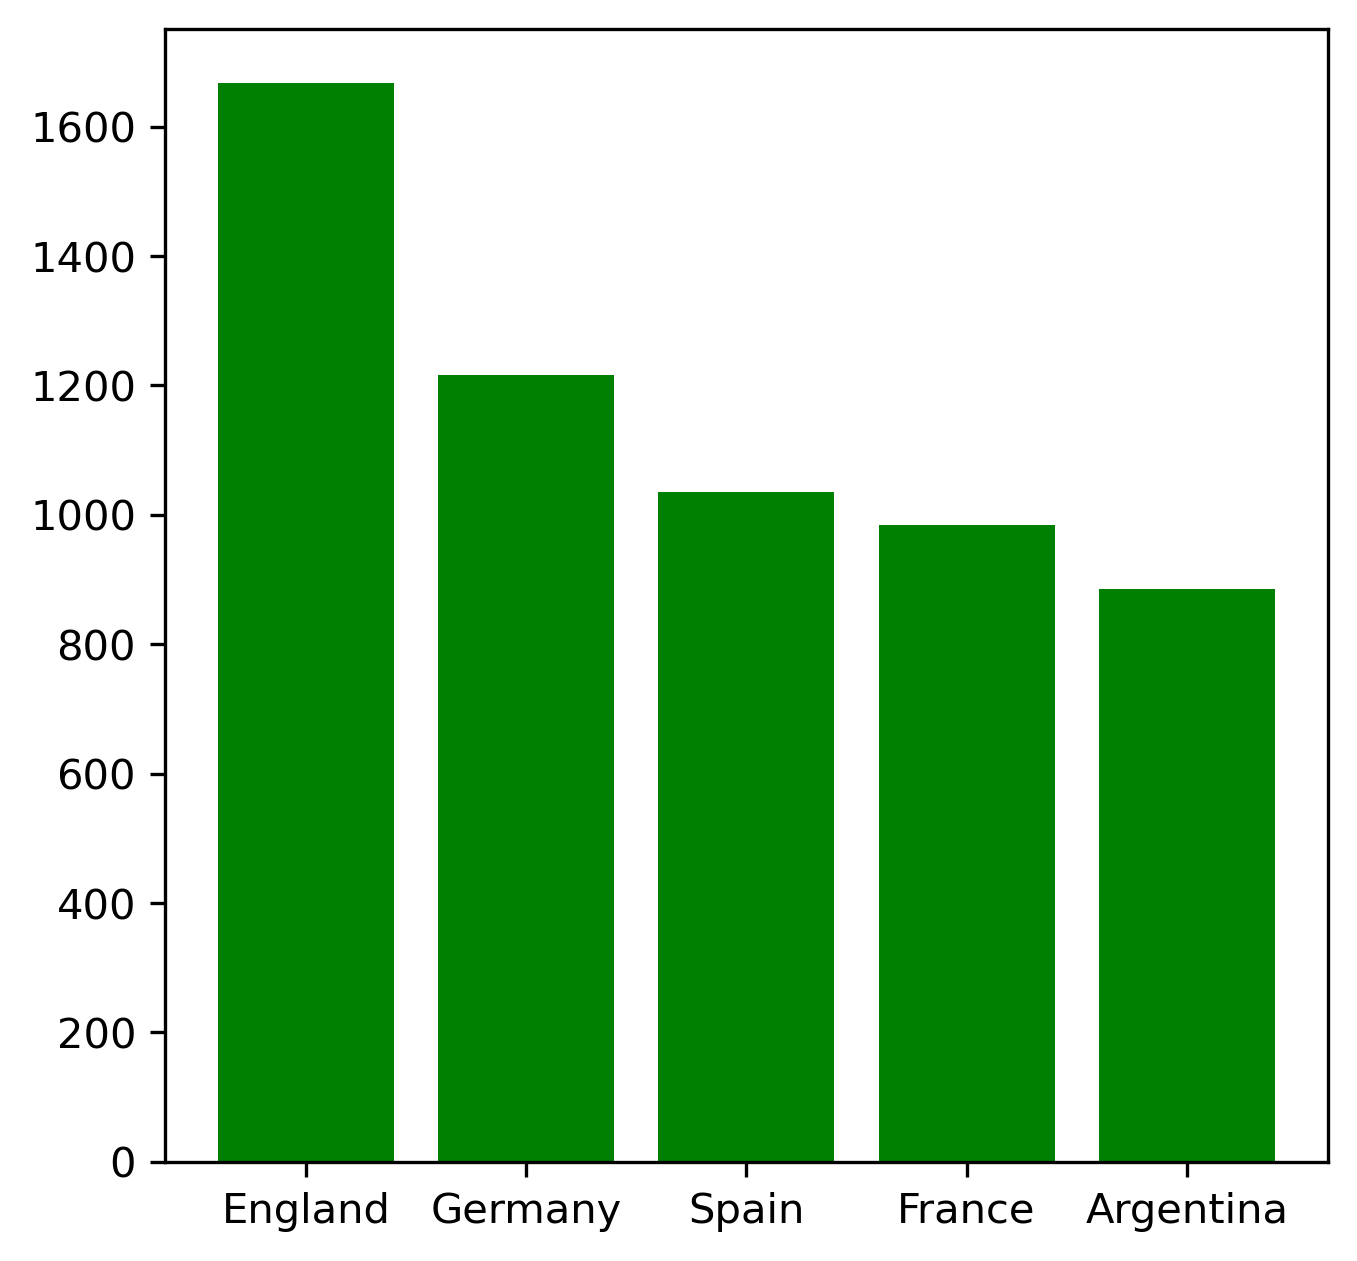

In [15]:
plt.figure(figsize=(5,5))
plt.bar(country_name, players_number, color="g")
plt.show()

In [16]:
player_salary = fifa[['short_name', 'wage_eur']]

In [17]:
player_salary.head()

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


In [18]:
player_salary = player_salary.sort_values(by=['wage_eur'], ascending=False)

In [19]:
player_salary.head()

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


In [25]:
p_name = list(player_salary['short_name'])[0:5]
p_salary = list(player_salary['wage_eur'])[0:5]
color = ["blue", "green", "red", "pink", "orange"]

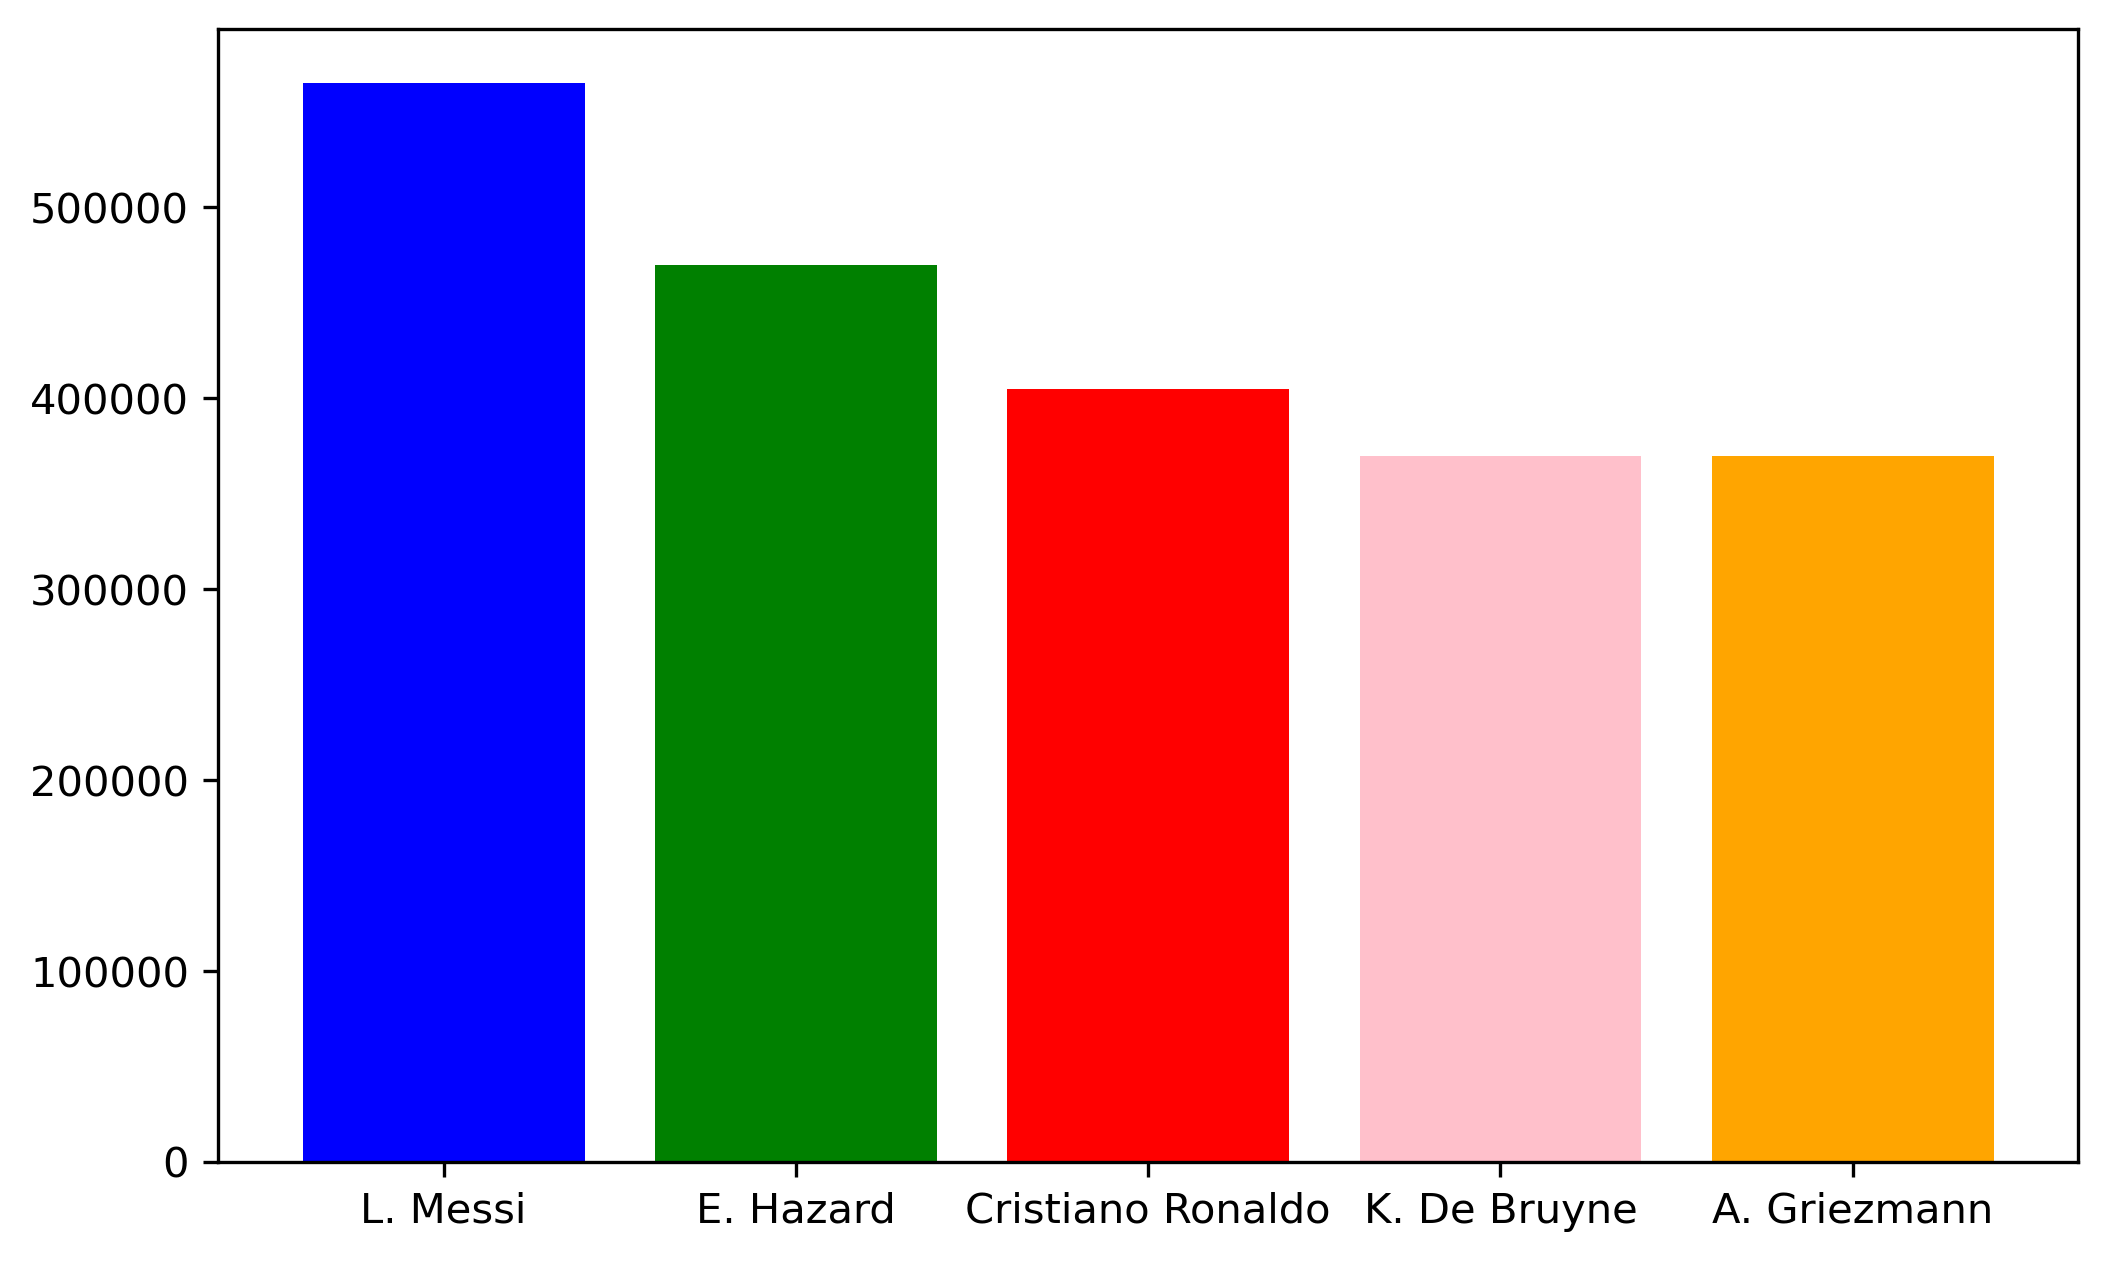

In [29]:
plt.figure(figsize=(8,5))
plt.bar(p_name, p_salary, color = color)
plt.show()

In [31]:
fifa['nationality'] == 'Germany'

0        False
1        False
2        False
3        False
4        False
         ...  
18273    False
18274    False
18275    False
18276    False
18277    False
Name: nationality, Length: 18278, dtype: bool

In [32]:
#For Germany Nationality

Germany = fifa[fifa['nationality']=='Germany']
Germany.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,NaN,GK,1.0,NaN,2014-07-01,2022.0,SUB,22.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,88,88,32000000,155000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,52800000.0,NaN,GK,1.0,NaN,2011-07-01,2021.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,87.0,91.0,87.0,57.0,85.0,"Power Free-Kick, Flair, Swerve Pass, Acrobatic...",15,13,25,55,11,30,14,11,59,46,54,60,51,84,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,87,91,85,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,88,88,57000000,330000,CM,Right,4,5,3,Medium/Medium,Normal,Yes,116900000.0,"#Playmaker , #Crosser, #Complete Midfielder",LCM,8.0,NaN,2014-07-17,2023.0,SUB,8.0,45.0,80.0,90.0,81.0,70.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Crowd Fav...",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,88,88,56000000,170000,"CAM, LM, ST",Right,4,4,4,High/Medium,Lean,Yes,92400000.0,"#Dribbler, #Playmaker , #Distance Shooter, #F...",CAM,11.0,NaN,2012-07-01,2023.0,ST,11.0,85.0,88.0,84.0,87.0,45.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Avoids Using Weaker Foot, Bea...",82,87,49,86,90,87,89,86,77,88,85,85,86,87,84,88,71,76,67,87,51,48,89,86,90,85,49,37,45,12,12,13,13,11,82+3,82+3,82+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,85+3,80+3,80+3,80+3,85+3,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
49,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,87,87,41000000,130000,CB,Right,4,3,3,High/Medium,Normal,Yes,67700000.0,"#Tackling , #Tactician",LCB,15.0,NaN,2019-07-01,2022.0,NaN,NaN,51.0,58.0,76.0,72.0,89.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,"Avoids Using Weaker Foot, Leadership, Finesse ...",6

In [33]:
Germany.sort_values(by=['height_cm'], ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
8016,236831,https://sofifa.com/player/236831/aaron-seydel/...,A. Seydel,Aaron Seydel,23,1996-02-07,199,90,Germany,1. FSV Mainz 05,67,73,1100000,9000,"ST, LM",Left,1,4,3,Medium/Low,Normal,No,2000000.0,NaN,SUB,36.0,NaN,2016-11-27,2021.0,NaN,NaN,68.0,64.0,53.0,66.0,29.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Crowd Favourite",59,68,69,58,59,69,43,31,35,72,67,69,53,58,34,66,63,51,78,56,55,19,63,59,55,68,25,28,22,12,9,14,11,9,66+2,66+2,66+2,64+2,65+2,65+2,65+2,64+2,62+2,62+2,62+2,62+2,54+2,54+2,54+2,62+2,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
1217,200212,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,77,77,5500000,23000,GK,Right,1,3,1,Medium/Medium,Normal,Yes,8800000.0,NaN,SUB,23.0,NaN,2017-07-01,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,74.0,64.0,82.0,41.0,75.0,Flair,10,8,25,39,9,15,14,17,35,17,32,48,30,72,28,48,67,37,82,19,40,30,6,48,23,53,20,15,16,77,74,64,75,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1389,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,76,78,6500000,14000,GK,Right,1,1,1,Medium/Medium,Stocky,No,9600000.0,NaN,SUB,13.0,NaN,2018-07-01,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,75.0,72.0,77.0,33.0,74.0,NaN,10,13,10,26,15,16,13,11,24,19,28,37,19,72,20,54,40,35,82,12,36,21,13,42,16,58,11,17,15,76,75,72,74,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11859,167437,https://sofifa.com/player/167437/dominik-stroh...,D. Stroh-Engel,Dominik Stroh-Engel,33,1985-11-27,197,94,Germany,SpVgg Unterhaching,64,64,280000,2000,ST,Right,1,3,2,Medium/Medium,Normal,No,406000.0,#Strength,SUB,7.0,NaN,2019-08-01,2021.0,NaN,NaN,37.0,64.0,47.0,52.0,35.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Long Passer (CPU AI Only),31,64,73,57,58,51,55,52,42,60,35,39,34,64,31,71,34,31,91,53,66,29,65,46,76,68,21,43,23,15,15,13,11,13,62+2,62+2,62+2,51+2,57+2,57+2,57+2,51+2,53+2,53+2,53+2,50+2,50+2,50+2,50+2,50+2,39+2,45+2,45+2,45+2,39+2,39+2,47+2,47+2,47+2,39+2
13576,239746,https://sofifa.com/player/239746/lukas-watkowi...,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,62,68,325000,2000,GK,Right,1,3,1,Medium/Medium,Stocky,No,569000.0,NaN,GK,1.0,NaN,2017-07-01,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,59.0,57.0,66.0,22.0,63.0,NaN,13,7,13,19,5,10,11,12,25,18,20,23,18,54,19,43,27,26,83,8,32,6,6,32,15,21,7,13,13,59,59,57,63,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
Germany.sort_values(by=['weight_kg'], ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
13576,239746,https://sofifa.com/player/239746/lukas-watkowi...,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,62,68,325000,2000,GK,Right,1,3,1,Medium/Medium,Stocky,No,569000.0,NaN,GK,1.0,NaN,2017-07-01,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,59.0,57.0,66.0,22.0,63.0,NaN,13,7,13,19,5,10,11,12,25,18,20,23,18,54,19,43,27,26,83,8,32,6,6,32,15,21,7,13,13,59,59,57,63,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1389,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,76,78,6500000,14000,GK,Right,1,1,1,Medium/Medium,Stocky,No,9600000.0,NaN,SUB,13.0,NaN,2018-07-01,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,75.0,72.0,77.0,33.0,74.0,NaN,10,13,10,26,15,16,13,11,24,19,28,37,19,72,20,54,40,35,82,12,36,21,13,42,16,58,11,17,15,76,75,72,74,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,179783,https://sofifa.com/player/179783/ralf-fahrmann...,R. Fährmann,Ralf Fährmann,30,1988-09-27,197,98,Germany,Norwich City,80,80,10000000,43000,GK,Right,2,1,1,Medium/Medium,Normal,Yes,NaN,NaN,SUB,21.0,FC Schalke 04,NaN,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,79.0,44.0,84.0,43.0,79.0,"Giant Throw-in, Acrobatic Clearance, Flair Passes",14,11,15,25,11,15,18,11,26,24,38,47,39,81,36,33,72,32,79,9,36,23,11,42,21,61,10,12,10,82,79,44,79,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,200212,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,77,77,5500000,23000,GK,Right,1,3,1,Medium/Medium,Normal,Yes,8800000.0,NaN,SUB,23.0,NaN,2017-07-01,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,74.0,64.0,82.0,41.0,75.0,Flair,10,8,25,39,9,15,14,17,35,17,32,48,30,72,28,48,67,37,82,19,40,30,6,48,23,53,20,15,16,77,74,64,75,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,85,90,46500000,115000,CB,Right,2,3,2,Medium/Medium,Stocky,Yes,80200000.0,"#Aerial Threat, #Tackling , #Strength",RCB,4.0,NaN,2017-07-01,2022.0,RCB,15.0,72.0,42.0,55.0,50.0,86.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,22,86,78,33,43,28,30,69,63,53,87,34,81,33,77,40,66,94,62,83,81,26,40,32,75,85,89,87,15,7,14,7,15,57+2,57+2,57+2,50+2,53+2,53+2,53+2,50+2,54+2,54+2,54+2,54+2,62+2,62+2,62+2,54+2,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2


In [38]:
Germany.sort_values(by=['wage_eur'], ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,88,88,57000000,330000,CM,Right,4,5,3,Medium/Medium,Normal,Yes,116900000.0,"#Playmaker , #Crosser, #Complete Midfielder",LCM,8.0,NaN,2014-07-17,2023.0,SUB,8.0,45.0,80.0,90.0,81.0,70.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Crowd Fav...",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,NaN,GK,1.0,NaN,2014-07-01,2022.0,SUB,22.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,86,92,61000000,195000,LW,Left,2,3,4,High/Medium,Lean,Yes,125100000.0,"#Speedster, #Dribbler, #Acrobat",SUB,19.0,NaN,2016-08-02,2021.0,LW,19.0,95.0,81.0,79.0,86.0,38.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Early Crosser",83,81,72,80,85,88,83,82,64,85,93,96,86,81,80,87,64,78,70,78,61,34,84,82,71,80,36,32,35,8,12,9,9,14,82+2,82+2,82+2,84+2,84+2,84+2,84+2,84+2,83+2,83+2,83+2,83+2,74+2,74+2,74+2,83+2,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
146,186942,https://sofifa.com/player/186942/ilkay-gundoga...,I. Gündoğan,İlkay Gündoğan,28,1990-10-24,180,80,Germany,Manchester City,84,84,31000000,180000,"CM, CDM",Right,3,4,4,High/Medium,Normal,Yes,57400000.0,#Playmaker,SUB,8.0,NaN,2016-07-01,2023.0,LCM,21.0,66.0,74.0,84.0,84.0,72.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Selfish, Finesse Shot, Crowd ...",78,71,50,88,75,84,85,74,85,88,67,66,77,85,77,77,61,71,73,74,70,77,78,86,76,87,75,74,67,11,14,5,5,13,74+3,74+3,74+3,79+3,79+3,79+3,79+3,79+3,82+3,82+3,82+3,80+3,83+3,83+3,83+3,80+3,76+3,79+3,79+3,79+3,76+3,74+3,72+3,72+3,72+3,74+3
70,189596,https://sofifa.com/player/189596/thomas-muller...,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,86,86,43500000,170000,"CAM, RM, RW",Right,4,4,3,High/High,Lean,Yes,71800000.0,"#Engine, #Clinical Finisher",SUB,25.0,NaN,2008-08-10,2021.0,NaN,NaN,72.0,83.0,79.0,78.0,55.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Speed Dribbler (CPU AI Only)",79,87

In [39]:
Germany[['short_name', 'wage_eur']].sort_values(by=['wage_eur'], ascending=False).head()

,short_name,wage_eur
36,T. Kroos,330000
6,M. ter Stegen,250000
55,L. Sané,195000
146,I. Gündoğan,180000
70,T. Müller,170000


In [40]:
#Shooting

player_shooting= fifa[['short_name','shooting']]

In [41]:
player_shooting.sort_values(by=['shooting'], ascending=False).head()

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
12,H. Kane,91.0
17,S. Agüero,90.0
205,F. Quagliarella,89.0


In [42]:
#defending

player_defending = fifa[['short_name', 'defending', 'nationality', 'club']]
player_defending.sort_values(by=['defending'], ascending=False).head()

,short_name,defending,nationality,club
16,G. Chiellini,90.0,Italy,Juventus
7,V. van Dijk,90.0,Netherlands,Liverpool
11,K. Koulibaly,89.0,Senegal,Napoli
35,D. Godín,89.0,Uruguay,Inter
49,M. Hummels,89.0,Germany,Borussia Dortmund


In [44]:
real_madrid= fifa[fifa['club'] == 'Real Madrid']

In [45]:
real_madrid.sort_values(by=['wage_eur'], ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,90,90,45000000,340000,CM,Right,4,4,4,High/High,Lean,Yes,92300000.0,"#Dribbler, #Playmaker , #Crosser, #Acrobat, #...",RCM,10.0,NaN,2012-08-01,2020.0,NaN,NaN,74.0,76.0,89.0,89.0,72.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Speed Dri...",86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9,77+3,77+3,77+3,84+3,83+3,83+3,83+3,84+3,86+3,86+3,86+3,85+3,87+3,87+3,87+3,85+3,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,88,88,57000000,330000,CM,Right,4,5,3,Medium/Medium,Normal,Yes,116900000.0,"#Playmaker , #Crosser, #Complete Midfielder",LCM,8.0,NaN,2014-07-17,2023.0,SUB,8.0,45.0,80.0,90.0,81.0,70.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Crowd Fav...",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
18,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,33,1986-03-30,184,82,Spain,Real Madrid,89,89,31500000,300000,CB,Right,4,3,3,High/Medium,Normal,Yes,64600000.0,"#Aerial Threat, #Tackling , #Tactician , #Comp...",LCB,4.0,NaN,2005-08-01,2020.0,RCB,15.0,72.0,68.0,75.0,73.0,87.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Avoids Using Weaker Foot, Leader...",66,63,92,80,69,65,74,72,83,83,74,71,78,87,66,79,93,80,85,62,90,88,67,71,86,84,85,87,90,11,8,9,7,11,74+3,74+3,74+3,72+3,73+3,73+3,73+3,72+3,74+3,74+3,74+3,73+3,78+3,78+3,78+3,73+3,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
46,165153,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,31,1987-12-19,185,81,France,Real Madrid,87,87,45000000,285000,"CF, ST",Right,4,4,4,Medium/Low,Normal,Yes,92300000.0,NaN,CF,9.0,NaN,2009-07-09,2021.0,NaN,NaN,76.0,82.0,80.0,86.0,39.0,77.0,Na

In [46]:
real_madrid.sort_values(by=['shooting'], ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
100,173731,https://sofifa.com/player/173731/gareth-bale/2...,G. Bale,Gareth Frank Bale,29,1989-07-16,185,82,Wales,Real Madrid,85,85,37500000,250000,"RW, LW, ST",Left,4,3,4,Medium/Medium,Lean,Yes,76900000.0,"#Speedster, #Distance Shooter, #Crosser, #FK S...",SUB,11.0,NaN,2013-09-02,2022.0,RM,11.0,91.0,87.0,82.0,82.0,58.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,"Inflexible, Power Free-Kick, Argues with Offic...",86,84,84,81,85,83,90,87,80,84,90,91,79,80,65,92,86,73,80,90,65,59,85,79,76,85,54,55,52,15,15,11,5,6,84+3,84+3,84+3,84+3,84+3,84+3,84+3,84+3,82+3,82+3,82+3,83+3,78+3,78+3,78+3,83+3,72+3,69+3,69+3,69+3,72+3,70+3,66+3,66+3,66+3,70+3
106,198710,https://sofifa.com/player/198710/james-rodrigu...,J. Rodríguez,James David Rodríguez Rubio,27,1991-07-12,180,75,Colombia,Real Madrid,85,85,40500000,225000,"CAM, CM, RM",Left,4,2,4,Medium/Medium,Normal,Yes,83000000.0,"#Playmaker , #Distance Shooter, #Crosser, #FK...",SUB,16.0,NaN,2014-07-22,2020.0,CAM,10.0,55.0,86.0,87.0,86.0,50.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Finesse Shot, Speed Dribbler (CPU AI ...",90,83,62,86,90,85,89,86,83,90,57,54,80,84,76,86,46,65,64,92,60,55,80,86,81,87,52,41,44,15,15,15,5,14,78+3,78+3,78+3,81+3,81+3,81+3,81+3,81+3,83+3,83+3,83+3,80+3,80+3,80+3,80+3,80+3,67+3,67+3,67+3,67+3,67+3,62+3,57+3,57+3,57+3,62+3
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
46,165153,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,31,1987-12-19,185,81,France,Real Madrid,87,87,45000000,285000,"CF, ST",Right,4,4,4,Medium/Low,Normal,Yes,92300000.0,NaN,CF,9.0,NaN,2009-07-09,2021.0,NaN,NaN,76.0,82.0,80.0,86.0,39.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (CPU AI Only), Gi...",75,84,83,85,83,86,81,73,72,90,78,74,78,85,69,82,77,79,80,76,65,39,88,86,82,87,47,24,18,13,11,5,5,7,83+3,83+3,83+3,83+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,82+3,78+3,78+3,78+3,82+3,62+3,62+3,62+3,62+3,62+3,58+3,54+3,54+3,54+3,58+3
161,232432,https://sofifa.com/player/232432/luka-jovic/20...,L. Jović,Luka Jović,21,1997-12-23,182,85,Serbia,Real Madrid,83,89,36500000,155000,ST,Right,1,5,3,Medium/Medium,Stocky,Yes,82100000.0,#Poacher,SUB,18.0,NaN,2019-07-01,2024.0,NaN,NaN,77.0,82.0,68.0,81.0,29.0,7

In [47]:
real_madrid.sort_values(by=['defending'], ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,33,1986-03-30,184,82,Spain,Real Madrid,89,89,31500000,300000,CB,Right,4,3,3,High/Medium,Normal,Yes,64600000.0,"#Aerial Threat, #Tackling , #Tactician , #Comp...",LCB,4.0,NaN,2005-08-01,2020.0,RCB,15.0,72.0,68.0,75.0,73.0,87.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Avoids Using Weaker Foot, Leader...",66,63,92,80,69,65,74,72,83,83,74,71,78,87,66,79,93,80,85,62,90,88,67,71,86,84,85,87,90,11,8,9,7,11,74+3,74+3,74+3,72+3,73+3,73+3,73+3,72+3,74+3,74+3,74+3,73+3,78+3,78+3,78+3,73+3,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
42,200145,https://sofifa.com/player/200145/carlos-henriq...,Casemiro,Carlos Henrique Venancio Casimiro,27,1992-02-23,185,84,Brazil,Real Madrid,87,89,53500000,240000,CDM,Right,3,3,2,Medium/High,Normal,Yes,113700000.0,"#Tackling , #Tactician , #Strength, #Complete ...",CDM,14.0,NaN,2013-07-11,2021.0,NaN,NaN,62.0,72.0,75.0,72.0,85.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Injury Prone, Argues with Offic...",58,64,76,83,61,69,63,74,82,78,58,66,62,86,66,86,87,88,90,81,89,86,69,77,66,84,84,87,86,13,14,16,12,12,74+3,74+3,74+3,71+3,74+3,74+3,74+3,71+3,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,78+3,84+3,84+3,84+3,78+3,79+3,84+3,84+3,84+3,79+3
76,201535,https://sofifa.com/player/201535/raphael-varan...,R. Varane,Raphaël Varane,26,1993-04-25,191,81,France,Real Madrid,85,90,45000000,205000,CB,Right,3,3,2,Medium/High,Lean,Yes,95600000.0,#Tackling,RCB,5.0,NaN,2011-07-01,2022.0,RCB,4.0,83.0,45.0,62.0,63.0,85.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,40,83,75,42,55,46,52,76,77,79,86,63,83,38,52,79,72,86,53,77,82,44,59,43,84,87,86,85,11,11,9,5,14,62+3,62+3,62+3,61+3,62+3,62+3,62+3,61+3,64+3,64+3,64+3,64+3,69+3,69+3,69+3,64+3,74+3,79+3,79+3,79+3,74+3,77+3,83+3,83+3,83+3,77+3
94,204963,https://sofifa.com/player/204963/daniel-carvaj...,Carvajal,Daniel Carvajal Ramos,27,1992-01-11,173,73,Spain,Real Madrid,85,86,38000000,205000,RB,Right,3,3,3,High/High,Stocky,Yes,80800000.0,#Engine,RB,2.0,NaN,2013-07-05,2022.0,RB,2.0,81.0,47.0,78.0,81.0,82.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,41,70,83,34,78,74,47,74,84,79,83,80,84,82,68,77,90,74,36,84,83,75,74,45,82,83,83,85,13,13,15,9,15,68+3,68+3,68+3,74+3,73+3,73+3,73+3,74+3,74+3,74+3,74+3,78+3,77+3,77+3,77+3,78+3,83+3,82+3,82+3,82+3,83+3,83+3,80+3,80+3,80+3,83+3
332,240130,https://sofifa.com/player/240130/eder-gabriel-...,Éder Militão,Éder Gabriel Militão,21,1998-01-18,186,78,Brazil,Real Madrid,81,88,23000000,105000,"CB, RB",Right,1,2,2,Medium/High,Lean,No,51800000.0,NaN,SUB,3.0,NaN,2019-07-01,2025.0,NaN,NaN,79.0,50.0,66.0,71.0,81.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,48,77,69,34,70,60,40,68,71,78,80,69,81,67,62,86,88,77,42,83,82,64,59,60,74,81,82,80,11,8,15

In [48]:
real_madrid['nationality'].value_counts()

Spain                 13
Brazil                 6
France                 3
Belgium                2
Croatia                1
Germany                1
Costa Rica             1
Wales                  1
Colombia               1
Serbia                 1
Dominican Republic     1
Uruguay                1
Japan                  1
Name: nationality, dtype: int64